## mnist 손글씨 숫자 분류

In [55]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [56]:
train_images.shape

(60000, 28, 28)

In [57]:
len(train_labels)

60000

In [58]:
test_images.shape

(10000, 28, 28)

In [59]:
test_labels.shape

(10000,)

In [60]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [61]:
test_images.shape

(10000, 28, 28)

In [62]:
len(test_labels)

10000

In [63]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [64]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [65]:
import matplotlib.pyplot as plt

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 18

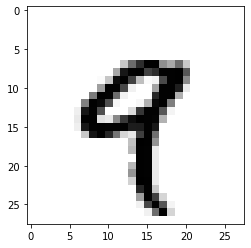

In [66]:
digit = train_images[4]
print(train_images[4])
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [67]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [68]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [69]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [70]:
from keras.utils import to_categorical

print(train_labels[0])

train_labels = to_categorical(train_labels)
print(train_labels[0])
test_labels = to_categorical(test_labels)


5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [71]:
history=network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.2546 - accuracy: 0.9271
Epoch 2/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.1032 - accuracy: 0.9697
Epoch 3/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.0675 - accuracy: 0.9800
Epoch 4/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.0494 - accuracy: 0.9852
Epoch 5/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.0367 - accuracy: 0.9891


In [72]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 63us/step


In [73]:
print('test_acc:', test_acc)

test_acc: 0.9800999760627747


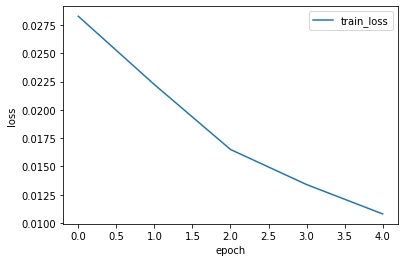

In [62]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss'])
plt.show()

## 영화 리뷰 분류 : 이진 분류

In [75]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [78]:
len(train_data)

25000

In [80]:
len(test_labels)

25000

In [65]:
train_labels[0]

1

In [66]:
max([max(sequence) for sequence in train_data])

9999

In [88]:
# word_index는 단어와 정수 인덱스를 매핑한 딕셔너리입니다
word_index = imdb.get_word_index()
#print(word_index)
# 정수 인덱스와 단어를 매핑하도록 뒤집습니다
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
#print(reverse_word_index)
# 리뷰를 디코딩합니다. 

# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [91]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
print( x_train.shape)
print(x_train[0])

# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)

(25000, 10000)
[0. 1. 1. ... 0. 0. 0.]


In [70]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [71]:
# 레이블을 벡터로 바꿉니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [72]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [73]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [74]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [75]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 200us/step - loss: 0.4906 - accuracy: 0.8023 - val_loss: 0.3653 - val_accuracy: 0.8741
Epoch 2/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.2893 - accuracy: 0.9069 - val_loss: 0.2959 - val_accuracy: 0.8882
Epoch 3/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.2142 - accuracy: 0.9288 - val_loss: 0.3100 - val_accuracy: 0.8746
Epoch 4/20
15000/15000 [==============================] - 2s 162us/step - loss: 0.1684 - accuracy: 0.9464 - val_loss: 0.3053 - val_accuracy: 0.8773
Epoch 5/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.1353 - accuracy: 0.9581 - val_loss: 0.2851 - val_accuracy: 0.8867
Epoch 6/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.1143 - accuracy: 0.9653 - val_loss: 0.3356 - val_accuracy: 0.8732
Epoch 7/20
15000/15000 [==============================] - 2s 1

In [76]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [77]:
import matplotlib.pyplot as plt

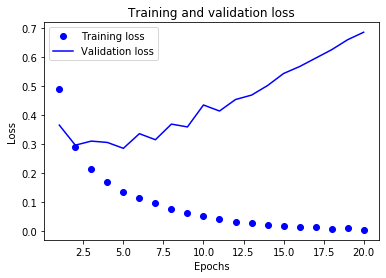

In [79]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

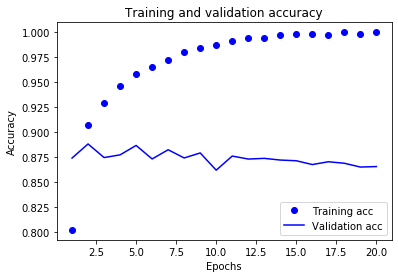

In [81]:
plt.clf()   # 그래프를 초기화합니다
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [82]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 112us/step - loss: 0.5465 - accuracy: 0.7348
Epoch 2/4
25000/25000 [==============================] - 3s 102us/step - loss: 0.3485 - accuracy: 0.8991
Epoch 3/4
25000/25000 [==============================] - 2s 99us/step - loss: 0.2399 - accuracy: 0.9261
Epoch 4/4
25000/25000 [==============================] - 3s 120us/step


In [83]:
results

[0.30409802187919616, 0.8795999884605408]

In [84]:
model.predict(x_test)

array([[0.1679658 ],
       [0.99996996],
       [0.7970583 ],
       ...,
       [0.16452836],
       [0.10860044],
       [0.52926725]], dtype=float32)

## 영화 리뷰 분류 : 다중 분류

In [87]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 4s 2us/step


In [88]:
len(train_data)

8982

In [89]:
len(test_data)

2246

In [90]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [91]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

557056/550378 [==============================] - 2s 4us/step


In [92]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [93]:
train_labels[10]

3

In [94]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)

In [95]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# 훈련 레이블 벡터 변환
one_hot_train_labels = to_one_hot(train_labels)
# 테스트 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels)

In [96]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [97]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [98]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [99]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [100]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 171us/step - loss: 2.5959 - accuracy: 0.5552 - val_loss: 1.6899 - val_accuracy: 0.6500
Epoch 2/20
7982/7982 [==============================] - 1s 140us/step - loss: 1.3715 - accuracy: 0.7171 - val_loss: 1.2828 - val_accuracy: 0.7180
Epoch 3/20
7982/7982 [==============================] - 1s 129us/step - loss: 1.0061 - accuracy: 0.7856 - val_loss: 1.1126 - val_accuracy: 0.7490
Epoch 4/20
7982/7982 [==============================] - 1s 130us/step - loss: 0.7898 - accuracy: 0.8317 - val_loss: 1.0080 - val_accuracy: 0.7890
Epoch 5/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.6222 - accuracy: 0.8696 - val_loss: 0.9470 - val_accuracy: 0.8090
Epoch 6/20
7982/7982 [==============================] - 1s 129us/step - loss: 0.4946 - accuracy: 0.8996 - val_loss: 0.9619 - val_accuracy: 0.7950
Epoch 7/20
7982/7982 [==============================] - 1s 128us/step - loss

In [101]:
import matplotlib.pyplot as plt

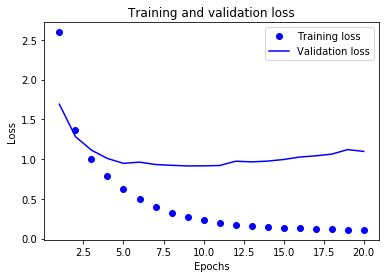

In [102]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

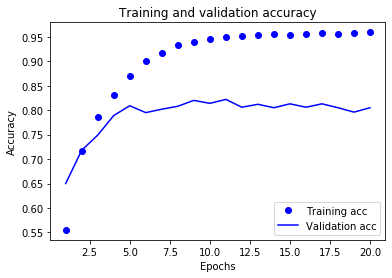

In [105]:
plt.clf()   # 그래프를 초기화합니다

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [106]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 146us/step - loss: 2.6954 - accuracy: 0.5060 - val_loss: 1.7759 - val_accuracy: 0.6480
Epoch 2/9
7982/7982 [==============================] - 1s 138us/step - loss: 1.4129 - accuracy: 0.7101 - val_loss: 1.3046 - val_accuracy: 0.7110
Epoch 3/9
7982/7982 [==============================] - 1s 132us/step - loss: 1.0332 - accuracy: 0.7766 - val_loss: 1.1380 - val_accuracy: 0.7450
Epoch 4/9
7982/7982 [==============================] - 1s 129us/step - loss: 0.8134 - accuracy: 0.8255 - val_loss: 1.0401 - val_accuracy: 0.7760
Epoch 5/9
7982/7982 [==============================] - 1s 132us/step - loss: 0.6555 - accuracy: 0.8627 - val_loss: 0.9775 - val_accuracy: 0.8000
Epoch 6/9
7982/7982 [==============================] - 1s 127us/step - loss: 0.5264 - accuracy: 0.8916 - val_loss: 0.9412 - val_accuracy: 0.8090
Epoch 7/9
7982/7982 [==============================] - 1s 133us/step - loss: 0.425

In [107]:
results

[1.0099641072994243, 0.7916295528411865]

In [108]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18210151380231523

In [109]:
predictions = model.predict(x_test)

In [110]:
predictions[0].shape

(46,)

In [111]:
np.sum(predictions[0])

1.0

In [112]:
np.argmax(predictions[0])

3

In [113]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [114]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [115]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 193us/step - loss: 2.6569 - accuracy: 0.3671 - val_loss: 1.9262 - val_accuracy: 0.5440
Epoch 2/20
7982/7982 [==============================] - 2s 191us/step - loss: 1.6599 - accuracy: 0.5510 - val_loss: 1.5367 - val_accuracy: 0.5760
Epoch 3/20
7982/7982 [==============================] - 1s 174us/step - loss: 1.3184 - accuracy: 0.6561 - val_loss: 1.3572 - val_accuracy: 0.6810
Epoch 4/20
7982/7982 [==============================] - 1s 171us/step - loss: 1.1028 - accuracy: 0.7225 - val_loss: 1.2594 - val_accuracy: 0.6930
Epoch 5/20
7982/7982 [==============================] - 1s 172us/step - loss: 0.9709 - accuracy: 0.7518 - val_loss: 1.2418 - val_accuracy: 0.7070
Epoch 6/20
7982/7982 [==============================] - 1s 170us/step - loss: 0.8762 - accuracy: 0.7727 - val_loss: 1.2111 - val_accuracy: 0.7260
Epoch 7/20
7982/7982 [==============================] - 1s 174us/step - loss

## 주택 가격 예측: 회귀 문제 

In [116]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

57344/57026 [==============================] - 0s 9us/step


In [117]:
train_data.shape

(404, 13)

In [118]:
test_data.shape

(102, 13)

In [119]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [120]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [121]:
from keras import models
from keras import layers

def build_model():
    # 동일한 모델을 여러 번 생성할 것이므로 함수를 만들어 사용합니다
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [122]:

import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # 검증 세트로 모델 평가
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [140]:
all_scores

[2.158902168273926, 2.3272101879119873, 2.6498172283172607, 2.263399839401245]

In [141]:
np.mean(all_scores)

2.3498323559761047

In [142]:
from keras import backend as K

# 메모리 해제
K.clear_session()

In [150]:
num_epochs = 100
all_mae_histories = []
for i in range(k):
    print('처리중인 폴드 #', i)
    # 검증 데이터 준비: k번째 분할
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # 훈련 데이터 준비: 다른 분할 전체
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # 케라스 모델 구성(컴파일 포함)
    model = build_model()
    # 모델 훈련(verbose=0 이므로 훈련 과정이 출력되지 않습니다)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
#history_dict = history.history
#print(history_dict.keys())

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [151]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [152]:
import matplotlib.pyplot as plt

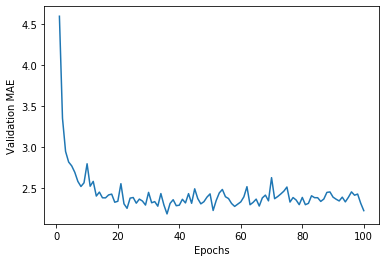

In [153]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

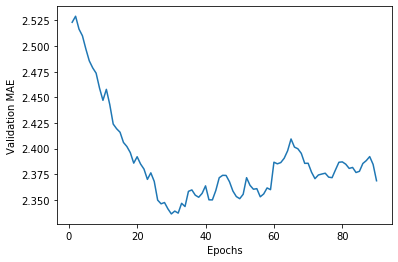

In [154]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [155]:
# 새롭게 컴파인된 모델을 얻습니다
model = build_model()
# 전체 데이터로 훈련시킵니다
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 127us/step


In [156]:
test_mae_score

2.5095155239105225